In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [123]:
df = pd.read_csv("world_cup_score.csv")

### Information about Dataset

In [124]:
df.head()

,Year,Match Number,City,Date,Winner,Team 1,Team 2,Total Score for Team 1,Total Wicket for Team 1,Total Score for Team 2,Total Wicket for Team 2,Batting team,Bowling team,Over Number,Runs Scored in over,Runs Scored till that over,Wicket Taken in over,Wickets Taken till that over,Winning Details,Match Detail
0,2023,1st Match (D/N),Ahmedabad,October 05 2023,New Zealand,ENG,NZ,282,9,283,1,ENG,NZ,1,12,12,0,0,New Zealand won by 9 wickets (with 82 balls re...,"1st Match (D/N), Ahmedabad, October 05, 2023,\..."
1,2023,1st Match (D/N),Ahmedabad,October 05 2023,New Zealand,ENG,NZ,282,9,283,1,ENG,NZ,2,0,12,0,0,New Zealand won by 9 wickets (with 82 balls re...,"1st Match (D/N), Ahmedabad, October 05, 2023,\..."
2,2023,1st Match (D/N),Ahmedabad,October 05 2023,New Zealand,ENG,NZ,282,9,283,1,ENG,NZ,3,4,16,0,0,New Zealand won by 9 wickets (with 82 balls re...,"1st Match (D/N), Ahmedabad, October 05, 2023,\..."
3,2023,1st Match (D/N),Ahmedabad,October 05 2023,New Zealand,ENG,NZ,282,9,283,1,ENG,NZ,4,5,21,0,0,New Zealand won by 9 wickets (with 82 balls re...,"1st Match (D/N), Ahmedabad, October 05, 2023,\..."
4,2023,1st Match (D/N),Ahmedabad,October 05 2023,New Zealand,ENG,NZ,282,9,283,1,ENG,NZ,5,5,26,0,0,New Zealand won by 9 wickets (with 82 balls re...,"1st Match (D/N), Ahmedabad, October 05, 2023,\..."


In [125]:
df['Total Runs'] = None
df['Total Wickets'] = None

for i in range(len(df)):
    if(df['Team 1'][i] == df['Batting team'][i]):
        df['Total Runs'][i] = df['Total Score for Team 1'][i]
        df['Total Wickets'][i] = df['Total Wicket for Team 1'][i]
    else:
        df['Total Runs'][i] = df['Total Score for Team 2'][i]
        df['Total Wickets'][i] = df['Total Wicket for Team 2'][i]

df.drop(['Team 1', 'Team 2', 'Total Score for Team 1', 'Total Score for Team 2', 'Total Wicket for Team 2', 'Total Wicket for Team 1'], axis = 1, inplace = True)

/var/folders/bp/t3cvrvjj561bp294978fkxnw0000gn/T/ipykernel_33415/2953141527.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Runs'][i] = df['Total Score for Team 1'][i]
/var/folders/bp/t3cvrvjj561bp294978fkxnw0000gn/T/ipykernel_33415/2953141527.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Wickets'][i] = df['Total Wicket for Team 1'][i]
/var/folders/bp/t3cvrvjj561bp294978fkxnw0000gn/T/ipykernel_33415/2953141527.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [126]:
print(f"Shape of Dataset : {df.shape}")
print("Information about Dataset -> ")
df.info()

Shape of Dataset : (21031, 16)
Information about Dataset -> 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21031 entries, 0 to 21030
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Year                          21031 non-null  int64 
 1   Match Number                  21031 non-null  object
 2   City                          21031 non-null  object
 3   Date                          21031 non-null  object
 4   Winner                        21031 non-null  object
 5   Batting team                  21031 non-null  object
 6   Bowling team                  21031 non-null  object
 7   Over Number                   21031 non-null  int64 
 8   Runs Scored in over           21031 non-null  int64 
 9   Runs Scored till that over    21031 non-null  int64 
 10  Wicket Taken in over          21031 non-null  int64 
 11  Wickets Taken till that over  21031 non-null  int64 
 12  Winning Detai

In [127]:
print("Description about Dataset -> ")
df.describe()

Description about Dataset -> 


,Year,Over Number,Runs Scored in over,Runs Scored till that over,Wicket Taken in over,Wickets Taken till that over
count,21031.000000,21031.000000,21031.000000,21031.000000,21031.000000,21031.000000
mean,2014.932290,23.391470,5.376492,116.560506,0.169749,3.004232
std,5.694119,13.800212,3.835236,79.200010,0.411207,2.400196
min,2007.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,12.000000,3.000000,52.000000,0.000000,1.000000
50%,2015.000000,23.000000,5.000000,106.000000,0.000000,3.000000
75%,2019.000000,35.000000,7.000000,168.000000,0.000000,4.000000
max,2023.000000,50.000000,36.000000,428.000000,4.000000,10.000000


In [128]:
df.nunique()

Year                              5
Match Number                    140
City                             43
Date                            191
Winner                           17
Batting team                     18
Bowling team                     18
Over Number                      50
Runs Scored in over              34
Runs Scored till that over      397
Wicket Taken in over              5
Wickets Taken till that over     11
Winning Details                 235
Match Detail                    239
Total Runs                      244
Total Wickets                    11
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

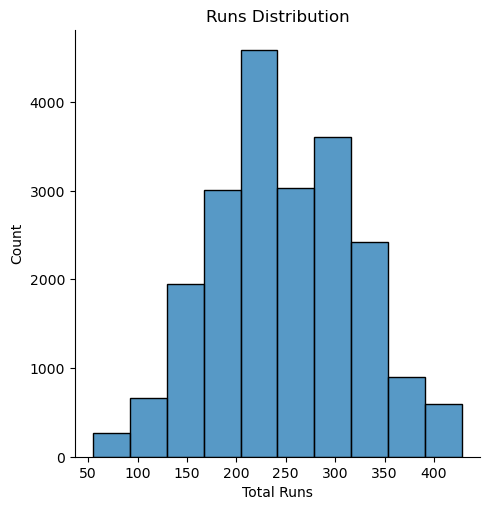

In [129]:
#Runs Distribution
sns.displot(df['Total Runs'],kde=False,bins=10)
plt.title("Runs Distribution")
plt.show

In [130]:
df.columns

Index(['Year', 'Match Number', 'City', 'Date', 'Winner', 'Batting team',
       'Bowling team', 'Over Number', 'Runs Scored in over',
       'Runs Scored till that over', 'Wicket Taken in over',
       'Wickets Taken till that over', 'Winning Details', 'Match Detail',
       'Total Runs', 'Total Wickets'],
      dtype='object')

### Removing Irrelevant Columns

In [131]:
irrelevant_columns = ['City','Year', 'Match Number', 'Date', 'Winner','Winning Details', 'Match Detail', 'Total Wickets', 'Runs Scored in over', 'Wicket Taken in over']
df.drop(irrelevant_columns, axis = 1, inplace = True)
df.head()

,Batting team,Bowling team,Over Number,Runs Scored till that over,Wickets Taken till that over,Total Runs
0,ENG,NZ,1,12,0,282
1,ENG,NZ,2,12,0,282
2,ENG,NZ,3,16,0,282
3,ENG,NZ,4,21,0,282
4,ENG,NZ,5,26,0,282


### Removing teams with very less entries

In [132]:
df['Batting team'].unique()

array(['ENG', 'NZ', 'PAK', 'NED', 'AFG', 'BAN', 'SA', 'SL', 'AUS', 'IND',
       'WI', 'ZIM', 'IRE', 'SCOT', 'UAE', 'KENYA', 'CAN', 'BER'],
      dtype=object)

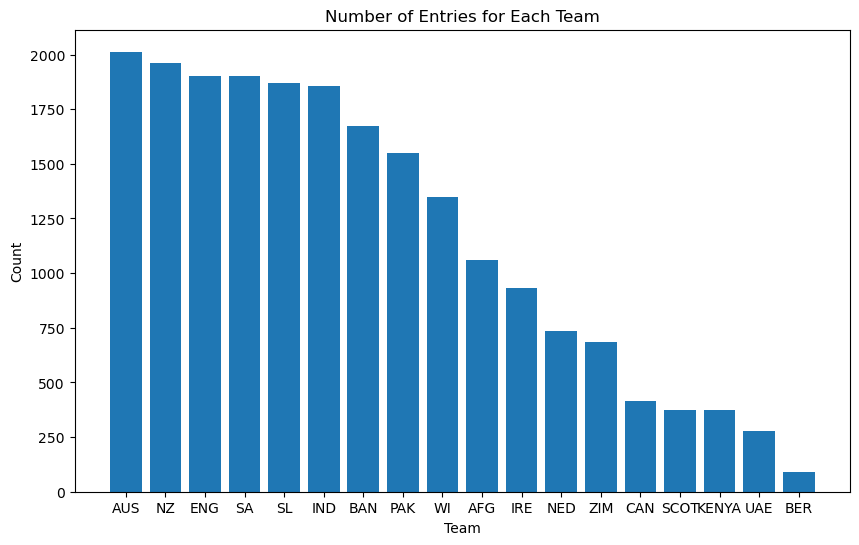

In [133]:
team_counts = df['Batting team'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(team_counts.index, team_counts.values)
plt.title('Number of Entries for Each Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.show()

In [134]:
popular_teams = ['ENG', 'NZ', 'PAK', 'NED', 'AFG', 'BAN', 'SA', 'SL', 'AUS', 'IND',
       'WI', 'IRE']
df = df[(df['Batting team'].isin(popular_teams)) & (df['Bowling team'].isin(popular_teams))]

In [135]:
team_counts = df['Batting team'].value_counts()
team_counts

AUS    1812
SA     1776
ENG    1771
NZ     1744
IND    1737
SL     1653
BAN    1607
PAK    1273
WI     1221
AFG    1012
IRE     784
NED     713
Name: Batting team, dtype: int64

### Adding Two Additional Columns

In [136]:
df['Runs in Last 5 Overs'] = df['Runs Scored till that over'].diff(periods=5).fillna(0)
df['Wickets in Last 5 Overs'] = df['Wickets Taken till that over'].diff(periods=5).fillna(0)

In [137]:
df.head(20)

,Batting team,Bowling team,Over Number,Runs Scored till that over,Wickets Taken till that over,Total Runs,Runs in Last 5 Overs,Wickets in Last 5 Overs
0,ENG,NZ,1,12,0,282,0.0,0.0
1,ENG,NZ,2,12,0,282,0.0,0.0
2,ENG,NZ,3,16,0,282,0.0,0.0
3,ENG,NZ,4,21,0,282,0.0,0.0
4,ENG,NZ,5,26,0,282,0.0,0.0
5,ENG,NZ,6,35,0,282,23.0,0.0
6,ENG,NZ,7,39,0,282,27.0,0.0
7,ENG,NZ,8,41,1,282,25.0,1.0
8,ENG,NZ,9,46,1,282,25.0,1.0
9,ENG,NZ,10,51,1,282,25.0,1.0


### Removing First 5 over of Every Match

In [138]:
df = df[df['Over Number'] >= 5]
df = df.reset_index(drop = True)

In [139]:
df.head()

,Batting team,Bowling team,Over Number,Runs Scored till that over,Wickets Taken till that over,Total Runs,Runs in Last 5 Overs,Wickets in Last 5 Overs
0,ENG,NZ,5,26,0,282,0.0,0.0
1,ENG,NZ,6,35,0,282,23.0,0.0
2,ENG,NZ,7,39,0,282,27.0,0.0
3,ENG,NZ,8,41,1,282,25.0,1.0
4,ENG,NZ,9,46,1,282,25.0,1.0


### Plotting a Correlation matrix

/var/folders/bp/t3cvrvjj561bp294978fkxnw0000gn/T/ipykernel_33415/2459787582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap(data=df.corr(), annot=True)


<Axes: >

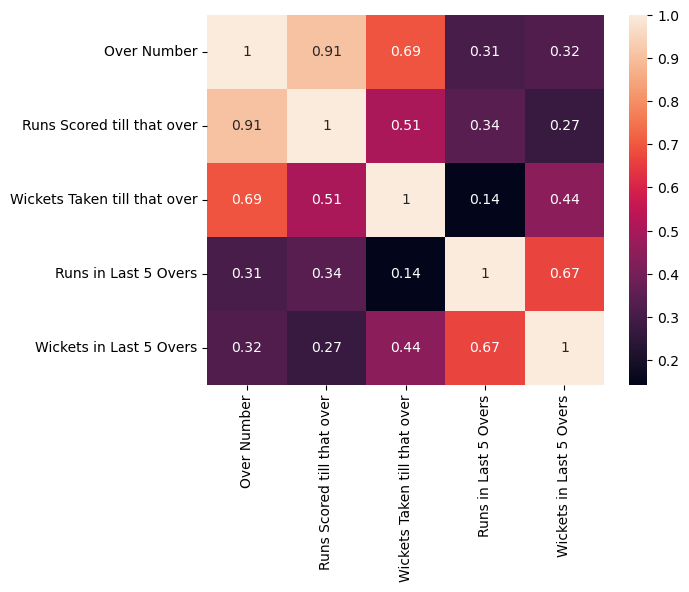

In [140]:
from seaborn import heatmap
heatmap(data=df.corr(), annot=True)

### Performing Label Encoding and One Hot Encoding

In [141]:
L = LabelEncoder()
for col in ['Batting team', 'Bowling team']:
  df[col] = L.fit_transform(df[col])
df.head()

,Batting team,Bowling team,Over Number,Runs Scored till that over,Wickets Taken till that over,Total Runs,Runs in Last 5 Overs,Wickets in Last 5 Overs
0,3,7,5,26,0,282,0.0,0.0
1,3,7,6,35,0,282,23.0,0.0
2,3,7,7,39,0,282,27.0,0.0
3,3,7,8,41,1,282,25.0,1.0
4,3,7,9,46,1,282,25.0,1.0


In [142]:
for col in ['Batting team', 'Bowling team']:
    print(f"{col}: {dict(zip(L.classes_, L.transform(L.classes_)))}")

Batting team: {'AFG': 0, 'AUS': 1, 'BAN': 2, 'ENG': 3, 'IND': 4, 'IRE': 5, 'NED': 6, 'NZ': 7, 'PAK': 8, 'SA': 9, 'SL': 10, 'WI': 11}
Bowling team: {'AFG': 0, 'AUS': 1, 'BAN': 2, 'ENG': 3, 'IND': 4, 'IRE': 5, 'NED': 6, 'NZ': 7, 'PAK': 8, 'SA': 9, 'SL': 10, 'WI': 11}


In [143]:
columns =  ['Over Number', 'Runs Scored till that over',
       'Wickets Taken till that over', 'Total Runs', 'Runs in Last 5 Overs',
       'Wickets in Last 5 Overs', 'Batting team AFG', 'Batting team AUS',
       'Batting team BAN', 'Batting team ENG', 'Batting team IND', 'Batting team IRE',
       'Batting team NED', 'Batting team NZ', 'Batting team PAK', 'Batting team SA',
       'Batting team SL', 'Batting team WI', 'Bowling team AFG',
       'Bowling team AUS', 'Bowling team BAN', 'Bowling team ENG', 'Bowling team IND',
       'Bowling team IRE', 'Bowling team NED', 'Bowling team NZ', 'Bowling team PAK',
       'Bowling team SA', 'Bowling team SL', 'Bowling team WI']

In [144]:
df_encoded = pd.get_dummies(df, columns=['Batting team', 'Bowling team'])

In [145]:
df_encoded.head()

,Over Number,Runs Scored till that over,Wickets Taken till that over,Total Runs,Runs in Last 5 Overs,Wickets in Last 5 Overs,Batting team_0,Batting team_1,Batting team_2,Batting team_3,...,Bowling team_2,Bowling team_3,Bowling team_4,Bowling team_5,Bowling team_6,Bowling team_7,Bowling team_8,Bowling team_9,Bowling team_10,Bowling team_11
0,5,26,0,282,0.0,0.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,6,35,0,282,23.0,0.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,7,39,0,282,27.0,0.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,8,41,1,282,25.0,1.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,9,46,1,282,25.0,1.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [146]:
df_encoded.columns = columns

In [147]:
df_encoded.head()

,Over Number,Runs Scored till that over,Wickets Taken till that over,Total Runs,Runs in Last 5 Overs,Wickets in Last 5 Overs,Batting team AFG,Batting team AUS,Batting team BAN,Batting team ENG,...,Bowling team BAN,Bowling team ENG,Bowling team IND,Bowling team IRE,Bowling team NED,Bowling team NZ,Bowling team PAK,Bowling team SA,Bowling team SL,Bowling team WI
0,5,26,0,282,0.0,0.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,6,35,0,282,23.0,0.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,7,39,0,282,27.0,0.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,8,41,1,282,25.0,1.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,9,46,1,282,25.0,1.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


### Test Train Split

In [149]:
features = df_encoded.drop(['Total Runs'], axis=1)
labels = df_encoded['Total Runs']

In [151]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.20, shuffle=True)

## Model Training

In [217]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

### Linear Regression

In [158]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [159]:
train_predictions_LR = regressor.predict(X_train)

test_predictions_LR = regressor.predict(X_test)

train_mse_LR = mean_squared_error(Y_train, train_predictions_LR)
test_mse_LR = mean_squared_error(Y_test, test_predictions_LR)

print(f'Training MSE: {train_mse_LR}')
print(f'Testing MSE: {test_mse_LR}')

Training MSE: 2441.7458776658395
Testing MSE: 2503.4153996174437


In [161]:
train_r2 = r2_score(Y_train, train_predictions)
test_r2 = r2_score(Y_test, test_predictions)

print(f'Training R²: {train_r2}')
print(f'Testing R²: {test_r2}')

Training R²: 0.5047035929550343
Testing R²: 0.49933583571289


### Decision Tree

In [167]:
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5)

In [168]:
train_predictions_tree = tree.predict(X_train)

test_predictions_tree = tree.predict(X_test)

train_mse_tree = mean_squared_error(Y_train, train_predictions_tree)
test_mse_tree = mean_squared_error(Y_test, test_predictions_tree)

print(f'Training MSE: {train_mse_tree}')
print(f'Testing MSE: {test_mse_tree}')

Training MSE: 2729.2726481097734
Testing MSE: 2896.581851354548


In [169]:
train_r2 = r2_score(Y_train, train_predictions_tree)
test_r2 = r2_score(Y_test, test_predictions_tree)

print(f'Training R²: {train_r2}')
print(f'Testing R²: {test_r2}')

Training R²: 0.44638017050852663
Testing R²: 0.42070551610441986


### Random Forest

In [208]:
forest = RandomForestRegressor(max_depth=35)
forest.fit(X_train, Y_train)

RandomForestRegressor(max_depth=35)

In [209]:
train_predictions_forest = forest.predict(X_train)

test_predictions_forest = forest.predict(X_test)

train_mse_forest = mean_squared_error(Y_train, train_predictions_forest)
test_mse_forest = mean_squared_error(Y_test, test_predictions_forest)

print(f'Training MSE: {train_mse_forest}')
print(f'Testing MSE: {test_mse_forest}')

Training MSE: 174.20305491087032
Testing MSE: 1304.4934202303273


In [210]:
train_r2 = r2_score(Y_train, train_predictions_forest)
test_r2 = r2_score(Y_test, test_predictions_forest)

print(f'Training R²: {train_r2}')
print(f'Testing R²: {test_r2}')

Training R²: 0.9646637481882057
Testing R²: 0.7391111726174349


### Comparing performance of Random Forest for different max_depths

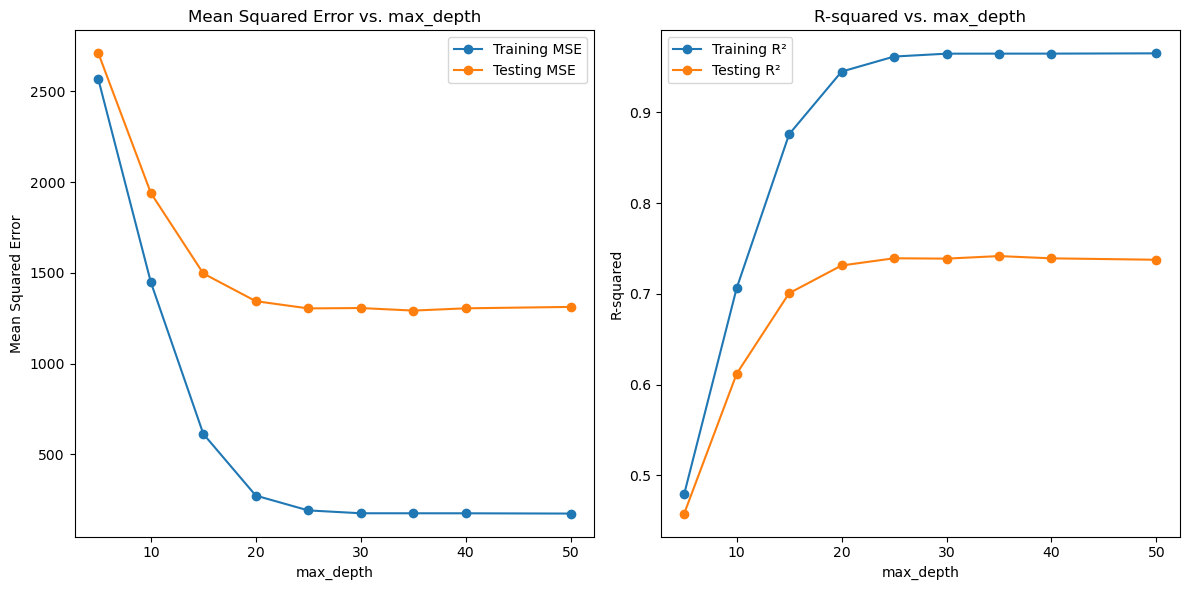

In [212]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

max_depth_values = [5, 10, 15, 20, 25, 30, 35, 40, 50]

train_mse_values = []
test_mse_values = []
train_r2_values = []
test_r2_values = []

for max_depth in max_depth_values:
    forest = RandomForestRegressor(max_depth=max_depth)
    forest.fit(X_train, Y_train)

    train_predictions_forest = forest.predict(X_train)

    test_predictions_forest = forest.predict(X_test)

    train_mse = mean_squared_error(Y_train, train_predictions_forest)
    test_mse = mean_squared_error(Y_test, test_predictions_forest)

    train_r2 = r2_score(Y_train, train_predictions_forest)
    test_r2 = r2_score(Y_test, test_predictions_forest)

    train_mse_values.append(train_mse)
    test_mse_values.append(test_mse)
    train_r2_values.append(train_r2)
    test_r2_values.append(test_r2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(max_depth_values, train_mse_values, label='Training MSE', marker='o')
plt.plot(max_depth_values, test_mse_values, label='Testing MSE', marker='o')
plt.title('Mean Squared Error vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(max_depth_values, train_r2_values, label='Training R²', marker='o')
plt.plot(max_depth_values, test_r2_values, label='Testing R²', marker='o')
plt.title('R-squared vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('R-squared')
plt.legend()

plt.tight_layout()
plt.show()


In [214]:
forest = RandomForestRegressor(max_depth=36)
forest.fit(X_train, Y_train)

RandomForestRegressor(max_depth=36)

In [215]:
train_predictions_forest = forest.predict(X_train)

test_predictions_forest = forest.predict(X_test)

train_mse_forest = mean_squared_error(Y_train, train_predictions_forest)
test_mse_forest = mean_squared_error(Y_test, test_predictions_forest)

print(f'Training MSE: {train_mse_forest}')
print(f'Testing MSE: {test_mse_forest}')

Training MSE: 173.00367870950348
Testing MSE: 1300.8848786424087


In [216]:
train_r2 = r2_score(Y_train, train_predictions_forest)
test_r2 = r2_score(Y_test, test_predictions_forest)

print(f'Training R²: {train_r2}')
print(f'Testing R²: {test_r2}')

Training R²: 0.9649070358819275
Testing R²: 0.7398328536691239


### K Neighbour Regressor

In [218]:
knr = KNeighborsRegressor()
knr.fit(X_train, Y_train)

KNeighborsRegressor()

In [219]:
train_predictions_knr = knr.predict(X_train)

test_predictions_knr = knr.predict(X_test)

train_mse_knr = mean_squared_error(Y_train, train_predictions_knr)
test_mse_knr = mean_squared_error(Y_test, test_predictions_knr)

print(f'Training MSE: {train_mse_knr}')
print(f'Testing MSE: {test_mse_knr}')

Training MSE: 1893.0635751586728
Testing MSE: 2812.556876606684


In [220]:
train_r2 = r2_score(Y_train, train_predictions_knr)
test_r2 = r2_score(Y_test, test_predictions_knr)

print(f'Training R²: {train_r2}')
print(f'Testing R²: {test_r2}')

Training R²: 0.616001158982153
Testing R²: 0.4375098761670021
